# Neural Network

### Name: Adiel Delgado Silva

### Import Libraries

In [215]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

In [216]:
df = pd.read_csv("iris.csv")

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Neural Networks Implementation

In [218]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Creating Model

In [219]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

NN = MLPClassifier(hidden_layer_sizes=5, max_iter=10, activation="relu", learning_rate="constant", learning_rate_init=0.04)
NN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.04, max_iter=10)

#### Evaluate the Models

In [220]:
y_pred = NN.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8

Text(0.5, 1.0, '')

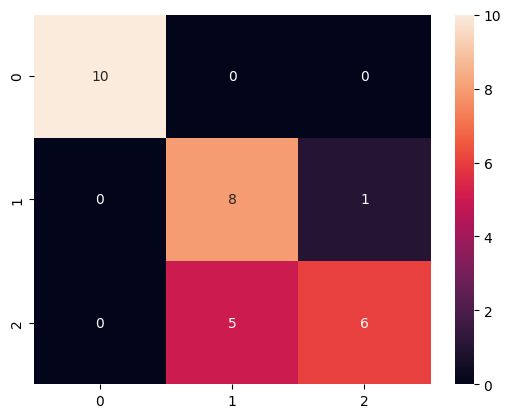

In [221]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred,), annot=True, fmt="d")
plt.title("")

In [222]:
y_pred = NN.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

0.75

Text(0.5, 1.0, '')

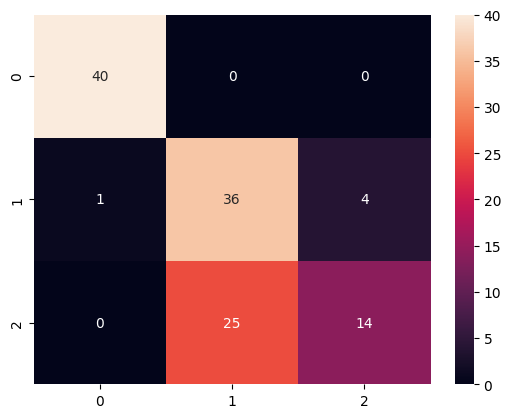

In [223]:
sns.heatmap(metrics.confusion_matrix(y_train, y_pred,), annot=True, fmt="d")
plt.title("")

#### Hyperparameter Tunning

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(50,), (75,), (100,)],
    "activation": ["relu"," tanh"],
    "learning_rate": ["constant"," adaptive"],
    "alpha": [0.0001, 0.001, 0.01]
}
best_model = GridSearchCV(estimator=NN, param_grid=param_grid, n_jobs=-1)

In [225]:
best_model.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=5,
                                     learning_rate_init=0.04, max_iter=10),
             n_jobs=-1,
             param_grid={'activation': ['relu', ' tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (75,), (100,)],
                         'learning_rate': ['constant', ' adaptive']})

In [226]:
best_model.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'constant'}

In [227]:
y_pred = best_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

Text(0.5, 1.0, '')

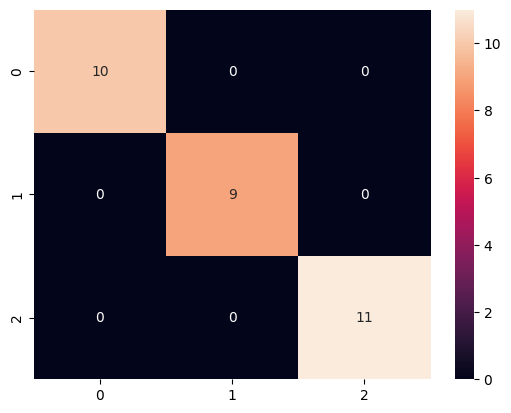

In [228]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred,), annot=True, fmt="d")
plt.title("")